# electric vehicle analysis and data analysis

### Problem Statement:
# Predicting Base MSRP for Electric Vehicles in the Pacific Northwest
Business Context:
As the adoption of electric vehicles (EVs) rapidly increases, it is crucial for automotive manufacturers, dealerships, and policymakers to understand the factors influencing the pricing of EVs. Accurately predicting the Base Manufacturer's Suggested Retail Price (Base MSRP) of electric vehicles can help manufacturers optimize pricing strategies, assist consumers in making informed purchase decisions, and support local governments in designing effective incentive programs.

This project focuses on analyzing the electric vehicle population in the Pacific Northwest, using historical data on EV registrations, vehicle types, locations, manufacturers, and other features to predict the Base MSRP of electric vehicles. By understanding the key attributes that impact EV pricing, stakeholders can gain insights into market trends and customer preferences.

# Project Objective:
The primary goal of this project is to develop a predictive model that estimates the Base MSRP of electric vehicles based on vehicle characteristics, geographic data, and electric utility information. The specific objectives include:

1. Exploratory Data Analysis (EDA):
Understand the structure and distribution of the dataset.

Identify trends and relationships between vehicle features, geographic factors, and Base MSRP.

Detect potential data quality issues such as missing values and outliers.

Visualize how features like vehicle make, model, electric vehicle type, state, city, and electric utility relate to EV pricing.

2. Regression Task (Predictive Modeling):
Problem: Predict the Base MSRP of electric vehicles using the provided dataset.

Goal: Build and evaluate regression models (e.g., Linear Regression, Decision Tree Regressor, Random Forest Regressor, Gradient Boosting Regressor, XGBoost Regressor) to accurately estimate vehicle prices.

3. Model Evaluation:
Use appropriate evaluation metrics:

Regression: Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), R² Score

Perform cross-validation to ensure model stability and generalization.

Apply hyperparameter tuning using GridSearchCV to optimize model performance.

4. Deliverables:
A ranked comparison of regression models based on validation RMSE and R² scores.

Visual summaries of model performances.

Scaled and cleaned datasets for training and validation.

(Optional) Deployment of the final model using a simple Streamlit interface for real-time Base MSRP predictions based on user input.



## data dictionary

* **Model Year:** Year the vehicle was manufactured.
* **Make:** Vehicle manufacturer.
* **Model:** Vehicle model name.
* **Electric Vehicle Type:** Type of electric vehicle (e.g., Battery Electric Vehicle, Plug-in Hybrid Electric Vehicle).
* **Clean Alternative Fuel Vehicle (CAFV) Eligibility:** Indicates whether the vehicle meets clean fuel standards.
* **Electric Range:** Estimated electric-only driving range in miles.
* **Base MSRP:** Manufacturer’s Suggested Retail Price (Target Variable).
* **Legislative District:** District where the vehicle is registered.
* **DOL Vehicle ID:** Unique vehicle ID assigned by the Department of Licensing.
* **Vehicle Location:** Location (city and state) where the vehicle is registered.
* **Electric Utility:** Utility company providing electric service in the vehicle’s location.
* **County:** County where the vehicle is registered.
* **City:** City where the vehicle is registered.
* **State:** State where the vehicle is registered.
* **2020 Census Tract:** Census tract identifier for the vehicle’s registration location.


## importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## loading dataset

In [2]:
a=pd.read_csv(r"C:\Users\vamsi\Downloads\Electric_Vehicle_Population_Data.csv")

In [3]:
print(" No. of rows before dropping duplicates :", a.shape[0])
a.drop_duplicates(inplace=True)
print(" No. of rows after dropping duplicates :", a.shape[0])

 No. of rows before dropping duplicates : 177866
 No. of rows after dropping duplicates : 177866


### viewing first 5 rows

In [4]:
a.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


## seeing information about the kind of data we have

In [5]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [6]:
# Percentage wise null values in columns
a.isnull().sum()/len(a)*100

VIN (1-10)                                           0.000000
County                                               0.002811
City                                                 0.002811
State                                                0.000000
Postal Code                                          0.002811
Model Year                                           0.000000
Make                                                 0.000000
Model                                                0.000000
Electric Vehicle Type                                0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.000000
Base MSRP                                            0.000000
Legislative District                                 0.218704
DOL Vehicle ID                                       0.000000
Vehicle Location                                     0.005060
Electric Utility                                     0.002811
2020 Cen

## checking to see how many values we are wrong/defaulted to 0 in base msrp

In [7]:
a['Base MSRP'].value_counts()

Base MSRP
0         174522
69900       1370
31950        381
52900        222
32250        136
59900        128
54950        126
39995        113
36900        104
44100         92
45600         82
64950         81
33950         76
52650         68
34995         66
36800         55
55700         54
53400         37
81100         23
98950         20
110950        20
90700         19
75095         14
102000        13
184400        10
43700         10
89100          8
109000         7
91250          5
32995          3
845000         1
Name: count, dtype: int64

In [8]:
zero_msrp = (a['Base MSRP'] == 0).sum()
print(f"Zero MSRP values: {zero_msrp} ({zero_msrp / len(a):.2%})")

Zero MSRP values: 174522 (98.12%)


## this is to view variance is remaining 2% of base msrp data

<Axes: xlabel='Base MSRP', ylabel='Count'>

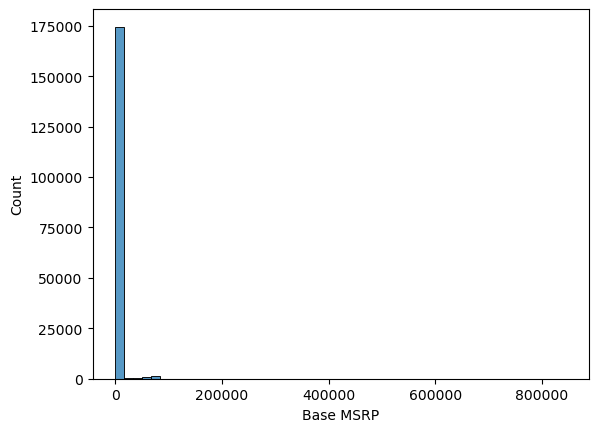

In [9]:
import seaborn as sns
a['Base MSRP'].describe()
sns.histplot(a['Base MSRP'].dropna(), bins=50)


## seeing correlation between different numerical datatypes to see co-dependency and eligibility to drop/modify columns

In [10]:
subset = a[['Base MSRP', 'Electric Range','Model Year','2020 Census Tract']].dropna()

# Pearson correlation
pearson_corr = subset.corr(method='pearson')
print(pearson_corr)

                   Base MSRP  Electric Range  Model Year  2020 Census Tract
Base MSRP           1.000000        0.108165   -0.230326          -0.000613
Electric Range      0.108165        1.000000   -0.476836          -0.000929
Model Year         -0.230326       -0.476836    1.000000           0.007564
2020 Census Tract  -0.000613       -0.000929    0.007564           1.000000


## to see the number of unique values in each column of the dataset for wrong values

In [11]:
a.nunique().sort_values(ascending=True)

Electric Vehicle Type                                     2
Clean Alternative Fuel Vehicle (CAFV) Eligibility         3
Model Year                                               22
Base MSRP                                                31
Make                                                     40
State                                                    46
Legislative District                                     49
Electric Utility                                         76
Electric Range                                          102
Model                                                   139
County                                                  196
City                                                    723
Vehicle Location                                        861
Postal Code                                             862
2020 Census Tract                                      2115
VIN (1-10)                                            10830
DOL Vehicle ID                          

In [12]:
for col in a.columns:
    print(f"\nColumn: {col}")
    print(a[col].unique())



Column: VIN (1-10)
['5YJYGDEE1L' '7SAYGDEE9P' '5YJSA1E4XK' ... 'YV4BR00Z6N' '1C4RJYE62P'
 'WMEFK9BA7J']

Column: County
['King' 'Snohomish' 'Kitsap' 'Thurston' 'Yakima' 'Island' 'Chelan'
 'Skagit' 'Spokane' 'Walla Walla' 'Grant' 'Stevens' 'Whitman' 'Kittitas'
 'Pend Oreille' 'Clark' 'Cowlitz' 'Jefferson' 'Clallam' 'Klickitat'
 'Pierce' 'Grays Harbor' 'Whatcom' 'Skamania' 'Wahkiakum' 'Washoe'
 'Benton' 'Franklin' 'Lewis' 'San Juan' 'Mason' 'Okanogan' 'Douglas'
 'Adams' 'Pacific' 'Asotin' 'District of Columbia' 'Columbia' 'Lincoln'
 'Kern' 'Cumberland' 'Oldham' 'Orange' 'Stafford' 'Montgomery' 'York'
 'Sonoma' 'San Diego' 'Marin' 'Ferry' 'Santa Clara' 'Contra Costa' 'Lake'
 "St. Mary's" 'Nueces' 'Platte' 'Los Angeles' 'DeKalb' 'Lee' 'Bexar'
 'Fairfax' 'Anne Arundel' 'Madison' 'Saratoga' 'Maricopa' 'Middlesex'
 'Mobile' 'Rockdale' 'Essex' 'Parker' 'El Paso' 'Honolulu' 'Tooele' 'Kent'
 'Alexandria' 'Autauga' "Prince George's" 'Cook' 'DuPage' 'Sacramento'
 'New Haven' 'Philadelphia' 'Moore

## see how many different values are missing and filling them up or dropping them as required

In [13]:
a.isna().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

## city wise cars distribution

In [14]:
cities_=a.City.value_counts()
cities_

City
Seattle          29447
Bellevue          8931
Redmond           6478
Vancouver         6193
Bothell           5863
                 ...  
Plymouth             1
Tempe                1
Chapel Hill          1
Vista                1
Elizabethtown        1
Name: count, Length: 723, dtype: int64

## graphical representation of top 10 cities

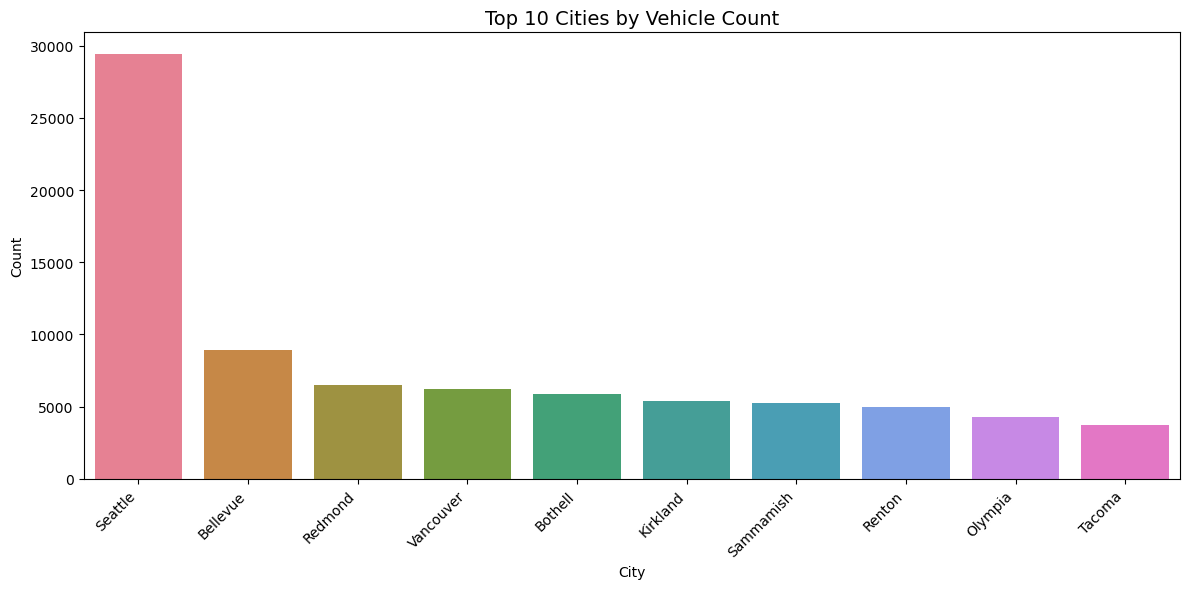

In [15]:
import seaborn as sns

top_cities = a.City.value_counts().head(10)

cities_df = top_cities.reset_index()
cities_df.columns = ['City', 'Count']

plt.figure(figsize=(12, 6))

# Plot with hue='City' for unique colors, legend hidden
sns.barplot(data=cities_df, x='City', y='Count', hue='City', dodge=False, legend=False, palette='husl')

plt.title('Top 10 Cities by Vehicle Count' , fontsize=14)
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## to view the top selling models

In [16]:
top_Model=a.Model.value_counts()
top_Model[:10]

Model
MODEL Y           35989
MODEL 3           30092
LEAF              13366
MODEL S            7735
BOLT EV            6821
MODEL X            5796
VOLT               4796
ID.4               3937
WRANGLER           3392
MUSTANG MACH-E     3322
Name: count, dtype: int64

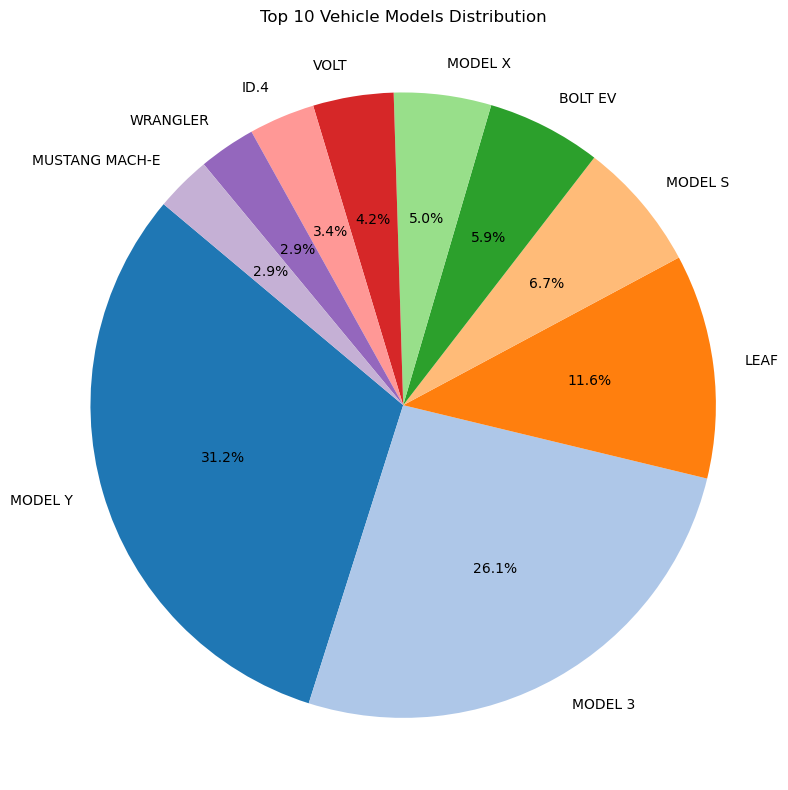

In [17]:
top_10_models = top_Model[:10]

plt.figure(figsize=(8, 8))
plt.pie(
    top_10_models,
    labels=top_10_models.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors[:10]  # unique colors for each slice
)

plt.title('Top 10 Vehicle Models Distribution')
plt.axis('equal')  # to make pie chart circular
plt.tight_layout()
plt.show()


## city wise model distribution

In [18]:
# count of model in each city
model_city_counts = a.groupby(['City', 'Model']).size().reset_index(name='Count')

# most common model in each city by frequency of that model
top_model_per_city = model_city_counts.loc[model_city_counts.groupby('City')['Count'].idxmax()]

print(top_model_per_city)

                          City    Model  Count
18                    Aberdeen  MODEL 3     20
42     Aberdeen Proving Ground  MODEL Y      1
44                        Acme    C-MAX      2
51                 Adairsville       I3      1
52                        Addy  MODEL 3      2
...                        ...      ...    ...
12881                   Yakima  MODEL 3    110
12936             Yarrow Point  MODEL 3     24
12981                     Yelm  MODEL 3     47
13005                 Yorktown  MODEL 3      1
13017                   Zillah  MODEL 3      8

[723 rows x 3 columns]


In [19]:
# Count occurrences of each Model in each City
model_city_counts = a.groupby(['City', 'Model']).size().reset_index(name='Count')
model_city_pivot = model_city_counts.pivot(index='City', columns='Model', values='Count').fillna(0)


In [20]:
# Top 5 cities
top_cities = a['City'].value_counts().head(5).index

# Top 10 models overall
top_models = a['Model'].value_counts().head(10).index

# Filter pivot table
filtered_pivot = model_city_pivot.loc[top_cities, top_models]


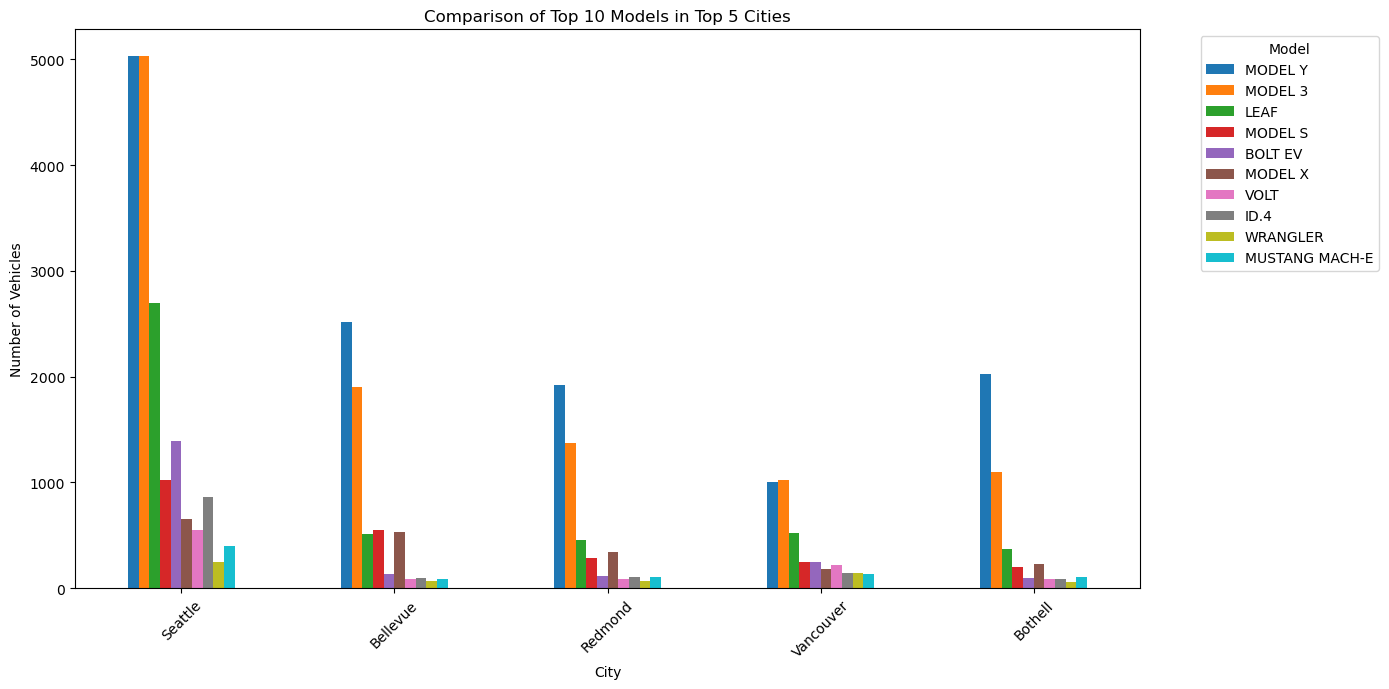

In [21]:
filtered_pivot.plot(kind='bar', figsize=(14, 7))

plt.title('Comparison of Top 10 Models in Top 5 Cities')
plt.xlabel('City')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## no of electric vehicles per county

C:\Users\vamsi\AppData\Local\Temp\ipykernel_21404\2229234455.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


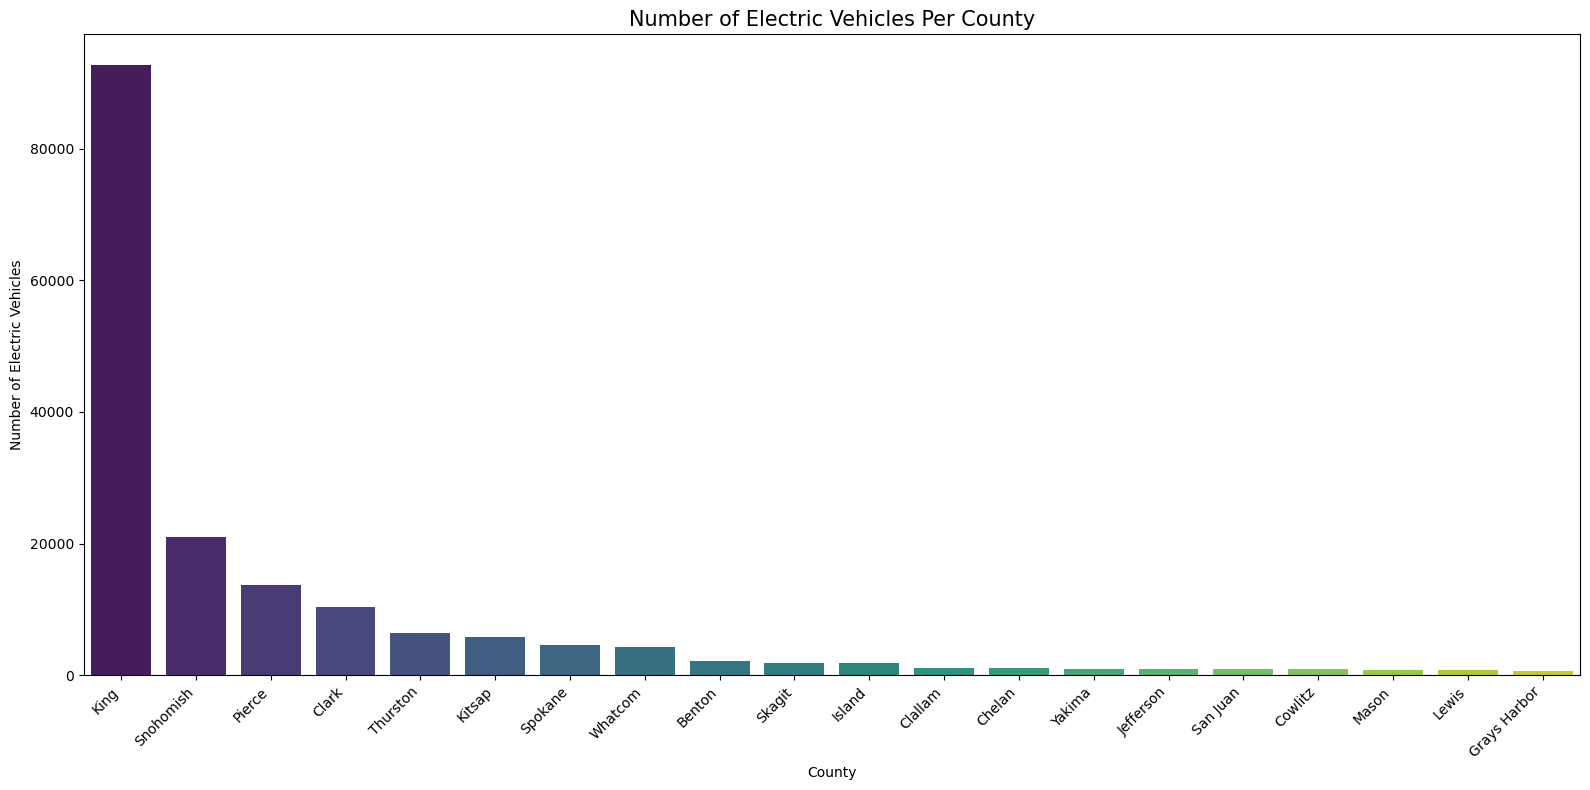

In [22]:
# Count how many records per county
County_counts = a['County'].value_counts().reset_index()

County_counts.columns = ['County', 'counts']
top_20_counties = County_counts.sort_values('counts', ascending=False).head(20)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,8))
plt.title("Number of Electric Vehicles Per County", fontsize=15)

sns.barplot(
    data=top_20_counties,
    x='County',
    y='counts',
    palette='viridis'
)

plt.xticks(rotation=45, ha='right')
plt.xlabel('County')
plt.ylabel('Number of Electric Vehicles')
plt.tight_layout()
plt.show()


## to check for outliers 

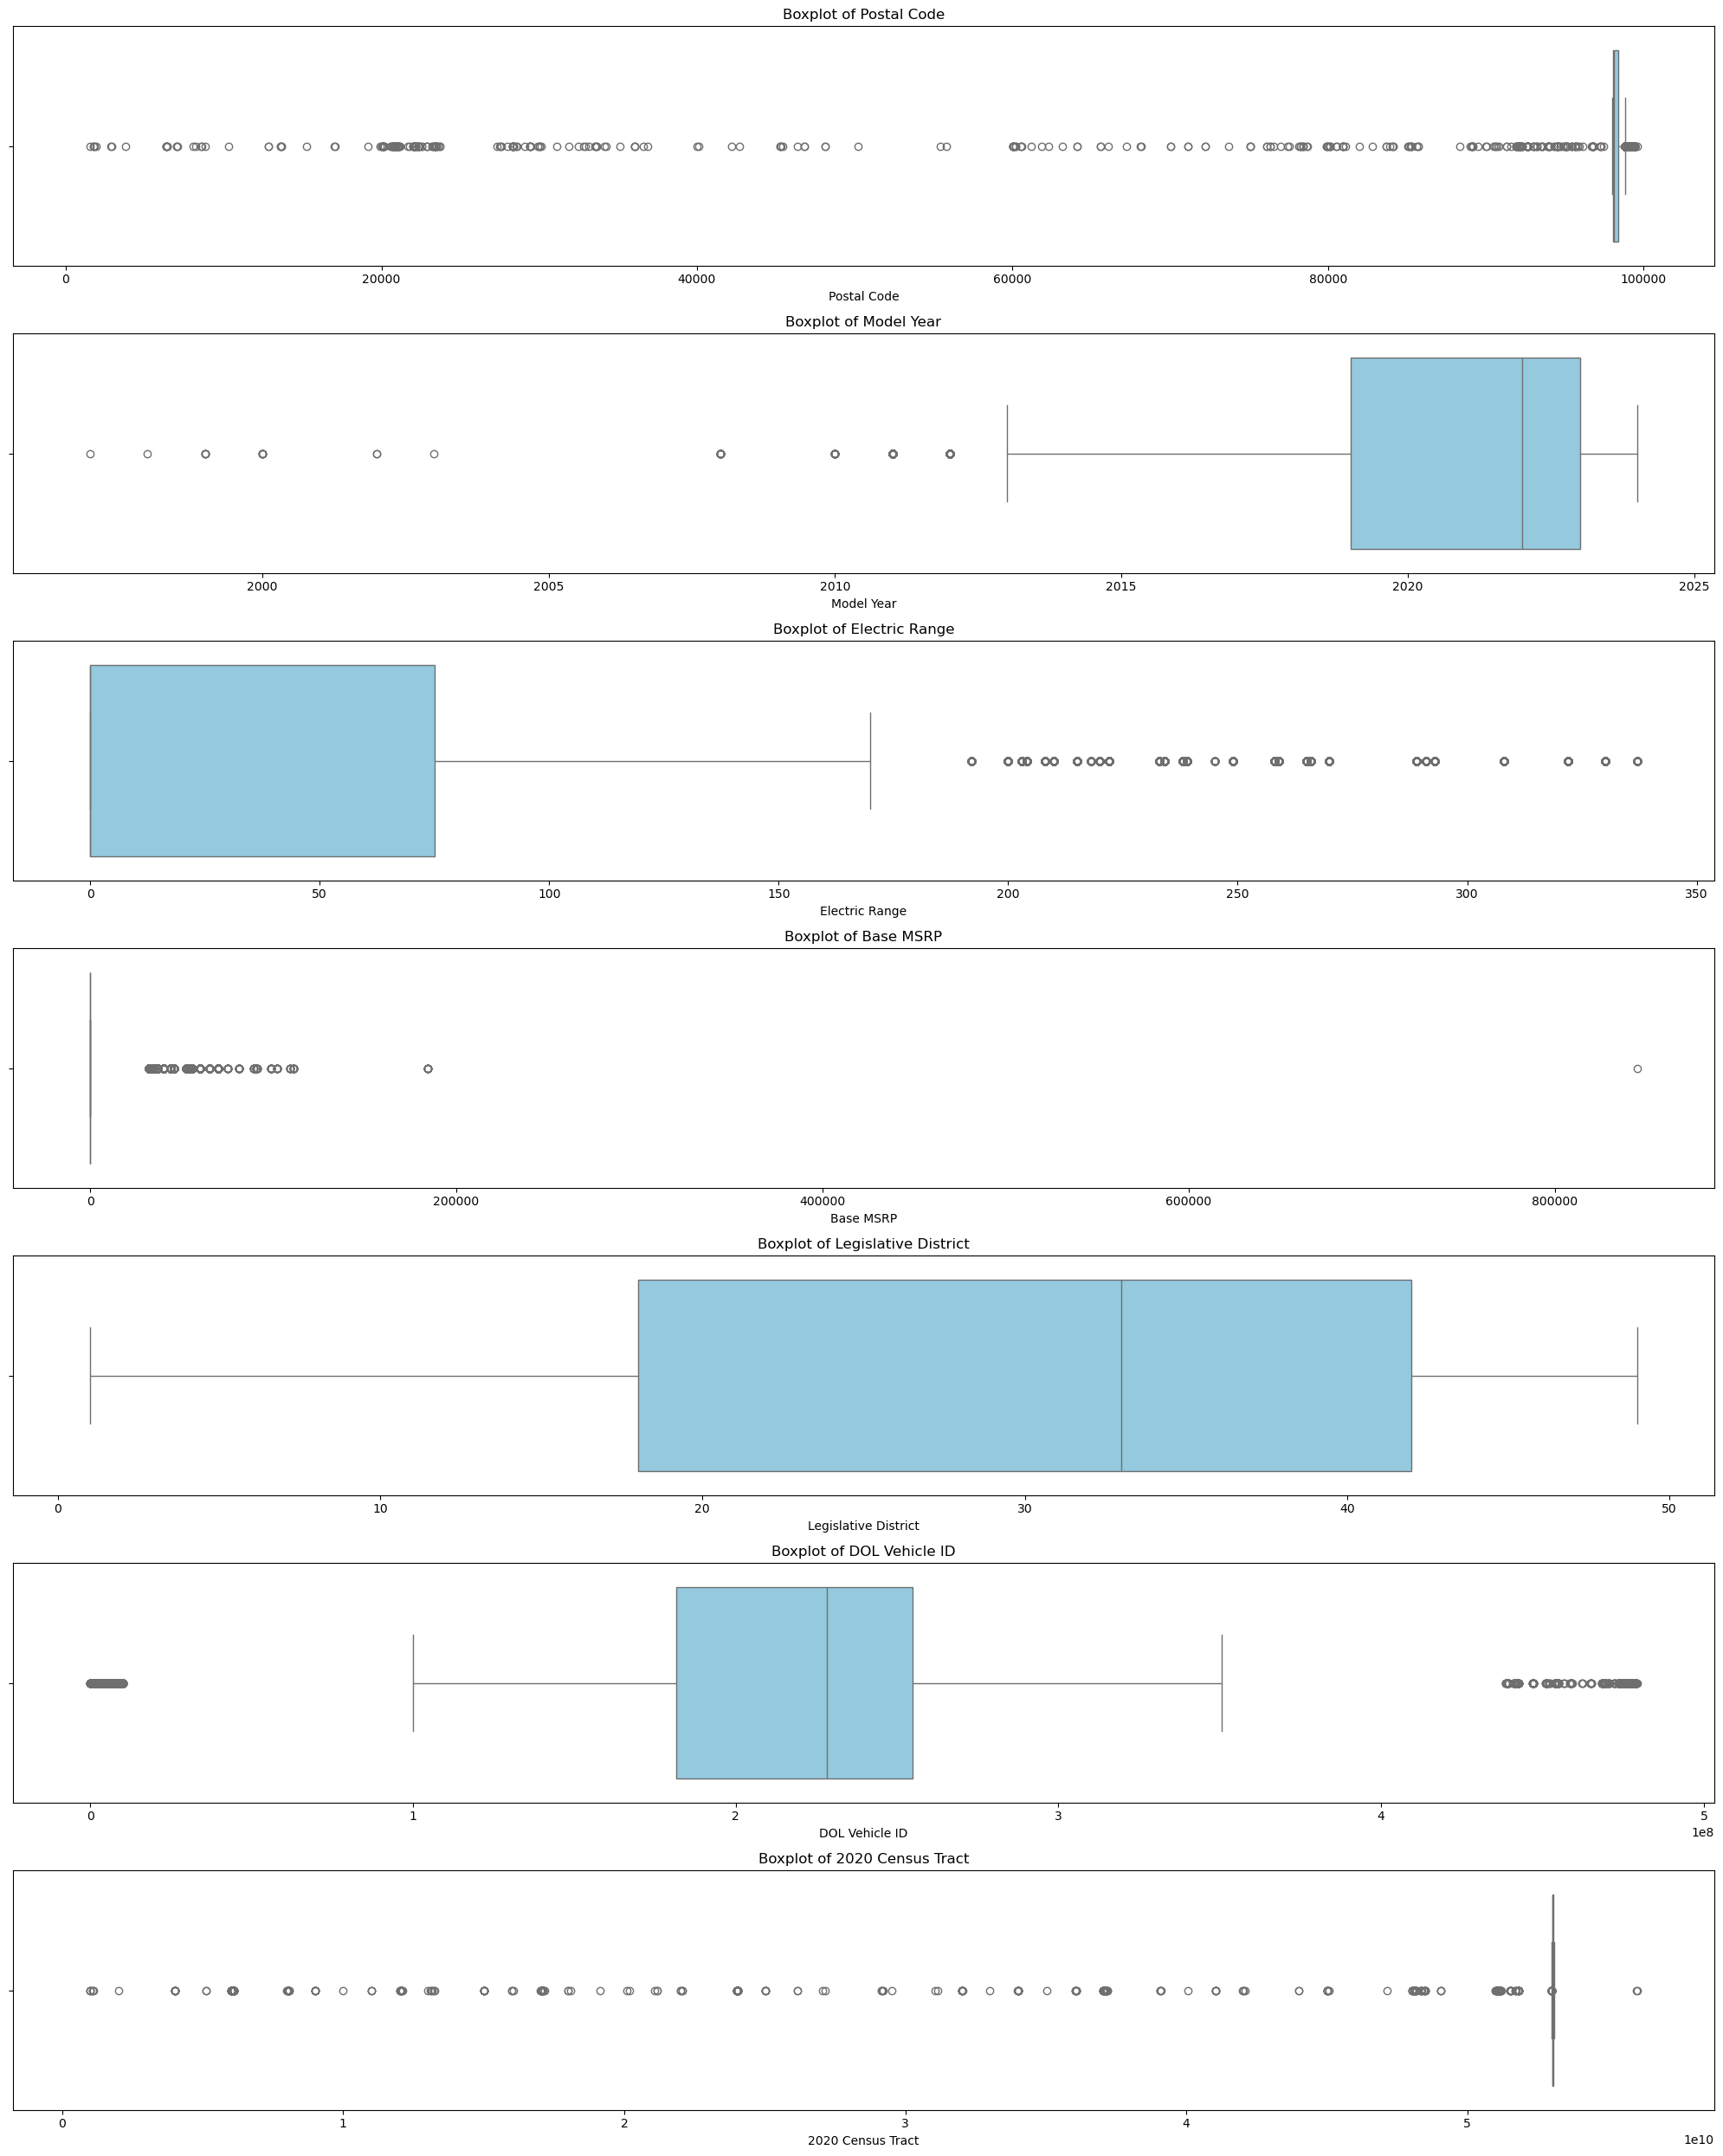

In [23]:
import seaborn as sns

numerical_cols = a.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 25))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(x=a[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.tight_layout()
plt.show()


## dropping any redundant duplicate file

In [24]:
print(" No. of rows before dropping duplicates :", a.shape[0])
a.drop_duplicates(inplace=True)
print(" No. of rows after dropping duplicates :", a.shape[0])

 No. of rows before dropping duplicates : 177866
 No. of rows after dropping duplicates : 177866


## base msrp vs electric range

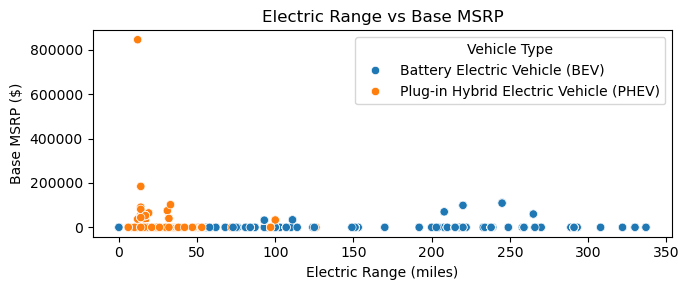

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 3))
sns.scatterplot(data=a, x='Electric Range', y='Base MSRP', hue='Electric Vehicle Type')
plt.title('Electric Range vs Base MSRP')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')
plt.legend(title='Vehicle Type')
plt.tight_layout()
plt.show()


## electric make by range

C:\Users\vamsi\AppData\Local\Temp\ipykernel_21404\4176323222.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered, x='Make', y='Electric Range', estimator='mean', ci=None)


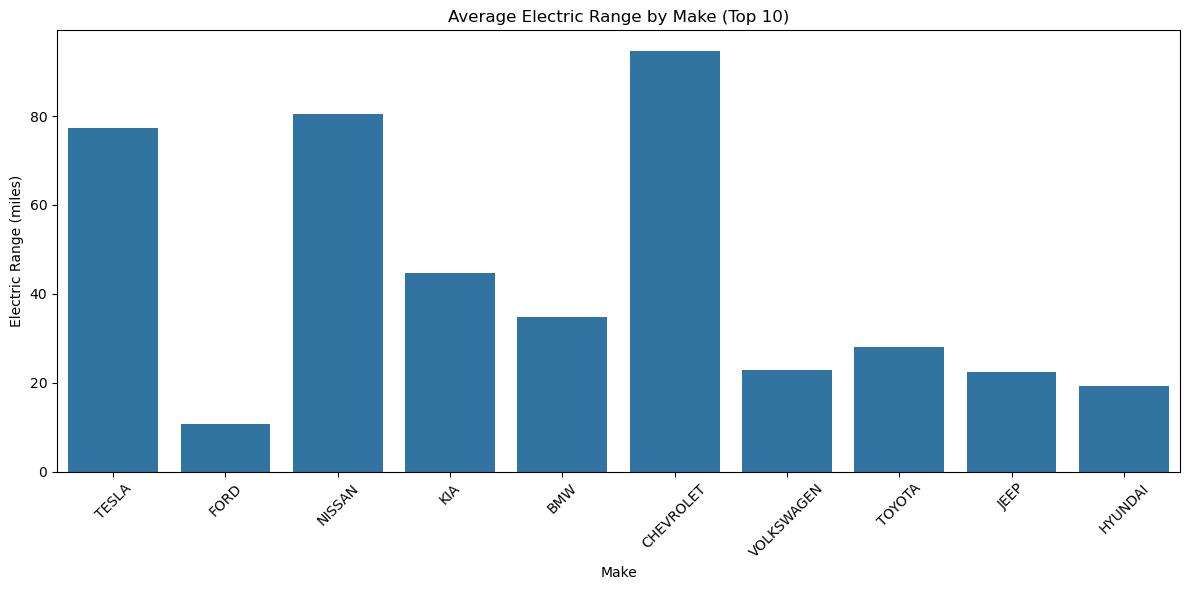

In [26]:
top_makes = a['Make'].value_counts().head(10).index
filtered = a[a['Make'].isin(top_makes)]

plt.figure(figsize=(12, 6))
sns.barplot(data=filtered, x='Make', y='Electric Range', estimator='mean', ci=None)
plt.title('Average Electric Range by Make (Top 10)')
plt.ylabel('Electric Range (miles)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


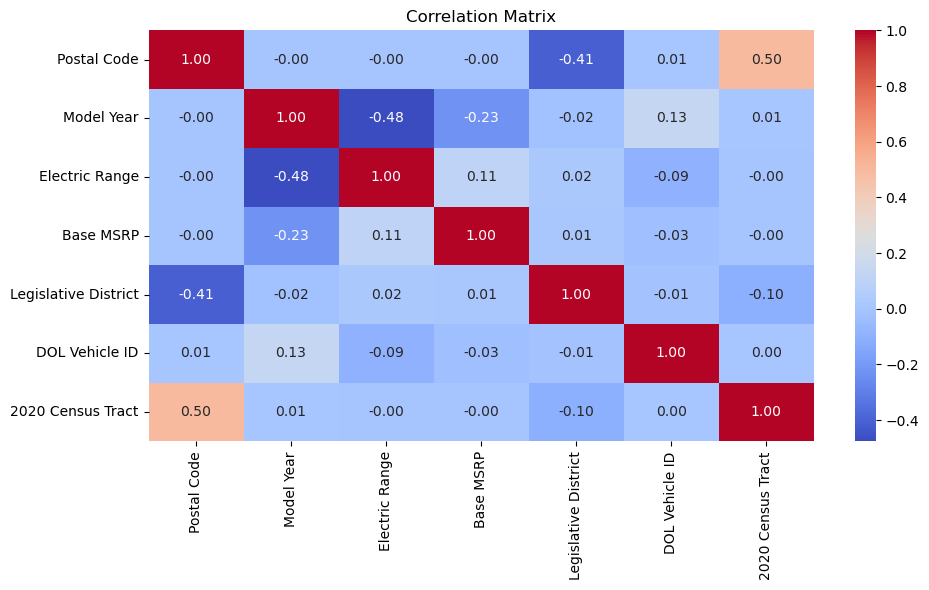

In [27]:
import numpy as np

plt.figure(figsize=(10, 6))
sns.heatmap(a.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()



In [28]:
# observation - as model year becomes more recent/increases, electric range of cars decreases
# observation - as model year becomes more recent, price of cars decreases and becomes more affordable

## starting data cleaning

## checking each feature for their unique values to see if there are any wrong entries

In [29]:
a=a.drop(['VIN (1-10)','County','State','City','Postal Code','Legislative District',
          'DOL Vehicle ID','Electric Utility','2020 Census Tract'],axis=1)

In [30]:
a['Model'] = a.groupby('Make')['Model'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


## some very early year outliers in Mode Year column, so we'll check them out in detail starting from minimum year

In [31]:
a['Model Year'].describe()

count    177866.000000
mean       2020.515512
std           2.989384
min        1997.000000
25%        2019.000000
50%        2022.000000
75%        2023.000000
max        2024.000000
Name: Model Year, dtype: float64

In [32]:
rows_1995 = a[a['Model Year'] == 1997]
rows_1995

,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Vehicle Location
160817,1997,CHEVROLET,S-10 PICKUP,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,39,0,POINT (-122.17673 48.05542)


In [33]:
# observation - data looks eligible, might be just a rare early model

## using cramer v function to find correlation among categorical data

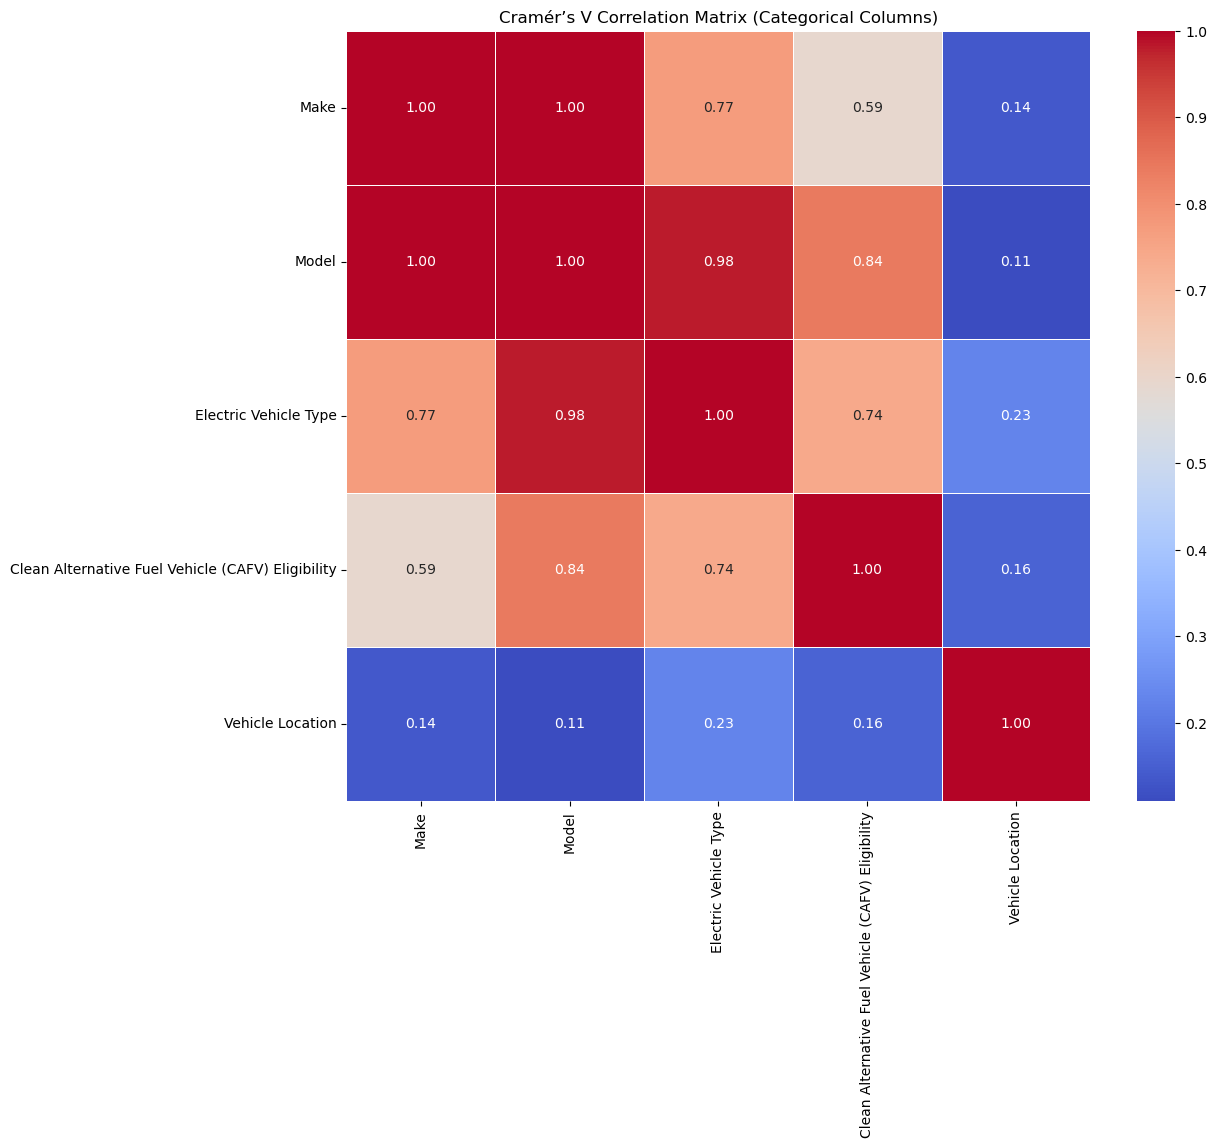

In [34]:
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cramér's V function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    if confusion_matrix.shape[0] == 1 or confusion_matrix.shape[1] == 1:
        return np.nan  # Avoid division by zero
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Assuming 'a' is your main DataFrame
cat_cols = a.select_dtypes(include='object').columns

# Create empty DataFrame to store Cramér’s V values
cramers_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)

# Compute Cramér's V for each pair
for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 == col2:
            cramers_matrix.loc[col1, col2] = 1.0
        else:
            try:
                v = cramers_v(a[col1], a[col2])  # <- fix here
                cramers_matrix.loc[col1, col2] = round(v, 3)
            except:
                cramers_matrix.loc[col1, col2] = np.nan

# Convert to float
cramers_matrix = cramers_matrix.astype(float)

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cramers_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Cramér’s V Correlation Matrix (Categorical Columns)")
plt.show()


In [35]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 8 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   Model Year                                         177866 non-null  int64 
 1   Make                                               177866 non-null  object
 2   Model                                              177866 non-null  object
 3   Electric Vehicle Type                              177866 non-null  object
 4   Clean Alternative Fuel Vehicle (CAFV) Eligibility  177866 non-null  object
 5   Electric Range                                     177866 non-null  int64 
 6   Base MSRP                                          177866 non-null  int64 
 7   Vehicle Location                                   177857 non-null  object
dtypes: int64(3), object(5)
memory usage: 10.9+ MB


In [36]:
a=a.drop('Vehicle Location',axis=1)

In [37]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 7 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   Model Year                                         177866 non-null  int64 
 1   Make                                               177866 non-null  object
 2   Model                                              177866 non-null  object
 3   Electric Vehicle Type                              177866 non-null  object
 4   Clean Alternative Fuel Vehicle (CAFV) Eligibility  177866 non-null  object
 5   Electric Range                                     177866 non-null  int64 
 6   Base MSRP                                          177866 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 9.5+ MB


## saving data file

In [38]:
a = a[a['Base MSRP'] != 0]

a.to_csv('EVpop.csv', index=False)


In [39]:
from scipy.stats import chi2_contingency
import pandas as pd

# Loop through each column to perform Chi-Square test with 'Base MSRP'
for i in a.columns:
    if i != 'Base MSRP':  # avoid comparing with itself
        contingency_table = pd.crosstab(a['Base MSRP'], a[i])
        
        try:
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            print(f"Chi-Square p-value for Base MSRP vs {i}: {p:.4f}")
        except ValueError as e:
            print(f"Could not compute Chi-Square for Base MSRP vs {i}: {e}")


Chi-Square p-value for Base MSRP vs Model Year: 0.0000
Chi-Square p-value for Base MSRP vs Make: 0.0000
Chi-Square p-value for Base MSRP vs Model: 0.0000
Chi-Square p-value for Base MSRP vs Electric Vehicle Type: 0.0000
Chi-Square p-value for Base MSRP vs Clean Alternative Fuel Vehicle (CAFV) Eligibility: 0.0000
Chi-Square p-value for Base MSRP vs Electric Range: 0.0000


In [40]:
b=pd.read_csv('EVpop.csv')

In [41]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3344 entries, 0 to 3343
Data columns (total 7 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Model Year                                         3344 non-null   int64 
 1   Make                                               3344 non-null   object
 2   Model                                              3344 non-null   object
 3   Electric Vehicle Type                              3344 non-null   object
 4   Clean Alternative Fuel Vehicle (CAFV) Eligibility  3344 non-null   object
 5   Electric Range                                     3344 non-null   int64 
 6   Base MSRP                                          3344 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 183.0+ KB


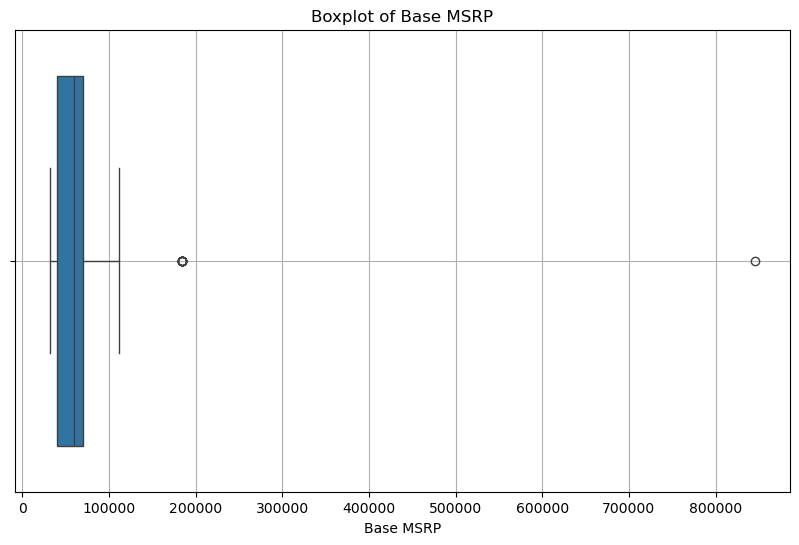

In [42]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x=b['Base MSRP'])
plt.title('Boxplot of Base MSRP')
plt.xlabel('Base MSRP')
plt.grid(True)
plt.show()

In [43]:
b['Base MSRP'].describe()

count      3344.000000
mean      57078.250598
std       22795.518132
min       31950.000000
25%       39995.000000
50%       59900.000000
75%       69900.000000
max      845000.000000
Name: Base MSRP, dtype: float64

In [44]:
b['Base MSRP'].isna().sum()

0

In [45]:
Q1 = b['Base MSRP'].quantile(0.25)
Q3 = b['Base MSRP'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
lower,upper

(-4862.5, 114757.5)

In [46]:
b[(b['Base MSRP'] <= lower) | (b['Base MSRP'] >= upper)]

,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP
219,2018,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,184400
221,2018,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,184400
236,2018,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,184400
600,2018,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,184400
882,2018,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,184400
941,2018,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,184400
1185,2015,PORSCHE,918,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,12,845000
1626,2018,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,184400
1755,2018,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,184400
2802,2018,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,184400


In [47]:
# Counting total number of outlier rows
outlier_count = b[(b['Base MSRP'] <= lower) | (b['Base MSRP'] >= upper)].shape[0]
print("Number of outliers:", outlier_count)


Number of outliers: 11


In [48]:
porsche_count = b[b['Make'].str.upper() == 'PORSCHE'].shape[0]

print(f"Number of Porsche entries: {porsche_count}")

Number of Porsche entries: 34


In [49]:
b['Base MSRP'] = np.where(b['Base MSRP'] > upper,upper, b['Base MSRP'])
b['Base MSRP'] = np.where(b['Base MSRP'] < lower, lower, b['Base MSRP'])


In [50]:
b['Base MSRP'].describe()

count      3344.000000
mean      56651.615580
std       17210.493162
min       31950.000000
25%       39995.000000
50%       59900.000000
75%       69900.000000
max      114757.500000
Name: Base MSRP, dtype: float64

In [51]:
b['Base MSRP'].quantile(0.97)   

89100.0

In [52]:
## values of 75% quantile are now same till 97 quantile

In [53]:
## dropping VIN since its just for vehicle identification and not useful in our prediction

In [54]:
cap_value = b['Base MSRP'].quantile(0.97)
b['Base MSRP'] = np.where(b['Base MSRP'] > cap_value, cap_value, b['Base MSRP'])

In [55]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3344 entries, 0 to 3343
Data columns (total 7 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Model Year                                         3344 non-null   int64  
 1   Make                                               3344 non-null   object 
 2   Model                                              3344 non-null   object 
 3   Electric Vehicle Type                              3344 non-null   object 
 4   Clean Alternative Fuel Vehicle (CAFV) Eligibility  3344 non-null   object 
 5   Electric Range                                     3344 non-null   int64  
 6   Base MSRP                                          3344 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 183.0+ KB


## encoding

In [56]:
b.to_csv('PopEV.csv',index=False)

In [57]:
d=pd.read_csv('PopEV.csv')

In [58]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3344 entries, 0 to 3343
Data columns (total 7 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Model Year                                         3344 non-null   int64  
 1   Make                                               3344 non-null   object 
 2   Model                                              3344 non-null   object 
 3   Electric Vehicle Type                              3344 non-null   object 
 4   Clean Alternative Fuel Vehicle (CAFV) Eligibility  3344 non-null   object 
 5   Electric Range                                     3344 non-null   int64  
 6   Base MSRP                                          3344 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 183.0+ KB


In [59]:
d.head()

,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP
0,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,32250.0
1,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950.0
2,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900.0
3,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900.0
4,2017,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,44100.0


In [60]:
d['Model'].unique()


array(['SOUL EV', 'SOUL', 'MODEL S', '330E', 'PACIFICA', '530E',
       'CROSSTREK', 'XC60', 'XC90', 'KARMA', 'COUNTRYMAN', '740E',
       'ROADSTER', 'PANAMERA', 'CAYENNE', 'CT6', '918', 'WHEEGO'],
      dtype=object)

In [61]:
d['Base MSRP'].isna().sum()

0

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Split target and features
X = d.drop('Base MSRP', axis=1)
y = d['Base MSRP']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,test_size=0.2, random_state=42
)


# Ordinal encode 'CAFV Eligibility'
cafv_map = {
    'Not eligible due to low battery range': 0,
    'Clean Alternative Fuel Vehicle Eligible': 1
}
X_train['CAFV_encoded'] = X_train['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].map(cafv_map)
X_test['CAFV_encoded'] = X_test['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].map(cafv_map)

# One-hot encode 'Electric Vehicle Type'
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_ohe = pd.DataFrame(ohe.fit_transform(X_train[['Electric Vehicle Type']]), index=X_train.index)
X_test_ohe = pd.DataFrame(ohe.transform(X_test[['Electric Vehicle Type']]), index=X_test.index)
X_train_ohe.columns = ohe.get_feature_names_out(['Electric Vehicle Type'])
X_test_ohe.columns = ohe.get_feature_names_out(['Electric Vehicle Type'])

# Frequency encode 'Make' and 'Model'
def frequency_encode(series):
    freq = series.value_counts(normalize=True)
    return series.map(freq)

X_train_fe = X_train[['Make', 'Model']].apply(frequency_encode)
X_test_fe = X_test[['Make', 'Model']].apply(lambda col: col.map(X_train[col.name].value_counts(normalize=True)))
X_test_fe = X_test_fe.fillna(0)

# Numeric columns
num_cols = ['Model Year', 'Electric Range']
X_train_num = X_train[num_cols]
X_test_num = X_test[num_cols]

# Combine all features
X_train_final = pd.concat([X_train_num, X_train[['CAFV_encoded']], X_train_ohe, X_train_fe], axis=1)
X_test_final = pd.concat([X_test_num, X_test[['CAFV_encoded']], X_test_ohe, X_test_fe], axis=1)


In [63]:
X_train_final

,Model Year,Electric Range,CAFV_encoded,Electric Vehicle Type_Battery Electric Vehicle (BEV),Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV),Make,Model
1357,2018,14,0,0.0,1.0,0.146916,0.053458
2480,2014,208,1,1.0,0.0,0.468037,0.454579
940,2018,14,0,0.0,1.0,0.146916,0.053458
1947,2013,208,1,1.0,0.0,0.468037,0.454579
3260,2013,208,1,1.0,0.0,0.468037,0.454579
...,...,...,...,...,...,...,...
1095,2017,14,0,0.0,1.0,0.146916,0.010093
1130,2013,208,1,1.0,0.0,0.468037,0.454579
1294,2014,208,1,1.0,0.0,0.468037,0.454579
860,2018,14,0,0.0,1.0,0.146916,0.083364


In [64]:
# Combine features and target for train and test sets
train_set = X_train_final.copy()
train_set['Base MSRP'] = y_train

test_set = X_test_final.copy()
test_set['Base MSRP'] = y_test

# Save to CSV
train_set.to_csv('train_set.csv', index=False)
test_set.to_csv('test_set.csv', index=False)


In [65]:
train_set.isna().sum()

Model Year                                                      0
Electric Range                                                  0
CAFV_encoded                                                    0
Electric Vehicle Type_Battery Electric Vehicle (BEV)            0
Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV)    0
Make                                                            0
Model                                                           0
Base MSRP                                                       0
dtype: int64

In [66]:
import pandas as pd

# Load your saved train and test sets
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')

# Drop target column before comparison
X_train_final = train.drop(columns=['Base MSRP']).copy()
X_test_final = test.drop(columns=['Base MSRP']).copy()

# Optional: Round floats to avoid tiny precision errors causing mismatches
X_train_final = X_train_final.round(5)
X_test_final = X_test_final.round(5)

# Merge on all feature columns to find exact duplicates
shared_cols = X_train_final.columns.intersection(X_test_final.columns).tolist()

# Use inner merge to find overlapping rows
overlap = pd.merge(X_test_final, X_train_final, how='inner', on=shared_cols)

print(f"🔍 Number of overlapping rows between test and train sets: {len(overlap)}")


🔍 Number of overlapping rows between test and train sets: 194806


In [67]:
train=pd.read_csv('train_set.csv')
test=pd.read_csv('test_set.csv')


## scaling

In [68]:
''' since we have done nominal encoding, for algorithms like logistic/linear regression it's possible they may interpret it as
 ordinal and do analysis with order in mind. hence they wont be very effective. however, for purpose of comparing different 
 ml algo, we'll use it.'''

# since ml algos like xgboost and random forest split data on basis of threshold instead of distance, scaling won't affect it

" since we have done nominal encoding, for algorithms like logistic/linear regression it's possible they may interpret it as\n ordinal and do analysis with order in mind. hence they wont be very effective. however, for purpose of comparing different \n ml algo, we'll use it."

In [69]:
## we usually seperate previously categorical and numerical again cuz it doesnt make sense to scale them

In [70]:
X_train_final=pd.read_csv('train_set.csv')
X_test_final=pd.read_csv('test_set.csv')

In [71]:
X_train_final.head()

,Model Year,Electric Range,CAFV_encoded,Electric Vehicle Type_Battery Electric Vehicle (BEV),Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV),Make,Model,Base MSRP
0,2018,14,0,0.0,1.0,0.146916,0.053458,45600.0
1,2014,208,1,1.0,0.0,0.468037,0.454579,69900.0
2,2018,14,0,0.0,1.0,0.146916,0.053458,45600.0
3,2013,208,1,1.0,0.0,0.468037,0.454579,69900.0
4,2013,208,1,1.0,0.0,0.468037,0.454579,69900.0


In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale only Electric Range
X_train_final['Electric Range'] = scaler.fit_transform(X_train_final[['Electric Range']])
X_test_final['Electric Range'] = scaler.transform(X_test_final[['Electric Range']])


In [73]:
X_train_final.shape

(2675, 8)

In [74]:
X_train_final.to_csv('Scaled_data_train.csv', index=False)
X_test_final.to_csv('Scaled_data_val.csv', index=False)


## Model tuning

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
# pip install xgboost
from xgboost import XGBRegressor

In [76]:

train= pd.read_csv('Scaled_data_train.csv')
test= pd.read_csv('Scaled_data_val.csv')

In [79]:
test['Base MSRP'].describe()

count      669.000000
mean     55762.817638
std      16151.215633
min      31950.000000
25%      39995.000000
50%      55700.000000
75%      69900.000000
max      89100.000000
Name: Base MSRP, dtype: float64

In [80]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
)
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# --- Load datasets ---
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')

# --- Split features and target ---
X_train = train.drop(columns=['Base MSRP'])
y_train = train['Base MSRP']

X_test = test.drop(columns=['Base MSRP'])
y_test = test['Base MSRP']

# --- Define models ---
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}

# --- Train, predict, evaluate ---
results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Train_RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Train_R²": r2_score(y_train, y_train_pred),
        "Val_RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Val_R²": r2_score(y_test, y_test_pred),
    })

# --- Show results ---
results_df = pd.DataFrame(results)
print(results_df)


               Model   Train_RMSE  Train_R²     Val_RMSE    Val_R²
0  Linear Regression  8227.003586  0.744800  7822.153836  0.765095
1                KNN   702.376892  0.998140     0.000000  1.000000
2      Decision Tree     0.000000  1.000000     0.000000  1.000000
3      Random Forest   241.886476  0.999779     0.000000  1.000000
4           AdaBoost  2464.124697  0.977106  2643.002942  0.973181
5  Gradient Boosting   208.440003  0.999836   201.043075  0.999845
6            XGBoost     0.006165  1.000000     0.005985  1.000000


In [81]:
def check_data_leakage(train_df: pd.DataFrame, test_df: pd.DataFrame, verbose=True) -> pd.DataFrame:
    """
    Checks for exact duplicated rows between train and test datasets.
    """
    # Ensure same columns and order
    shared_cols = sorted(list(set(train_df.columns).intersection(set(test_df.columns))))
    train_common = train_df[shared_cols].drop_duplicates()
    test_common = test_df[shared_cols].drop_duplicates()

    # Concatenate for duplicate detection
    combined = pd.concat([train_common.assign(_source='train'),
                          test_common.assign(_source='test')],
                         ignore_index=True)

    # Mark duplicates that appear in both sets
    dup_rows = combined.duplicated(subset=shared_cols, keep=False)

    duplicates = combined[dup_rows]
    duplicates_both = duplicates.groupby(list(shared_cols)).filter(lambda x: x['_source'].nunique() > 1)

    if verbose:
        print(f"✅ Checked {len(train_df)} train rows and {len(test_df)} test rows.")
        print(f"⚠️  Found {duplicates_both.shape[0]} duplicated rows appearing in both train and test sets.")

    return duplicates_both.drop(columns=['_source'])


In [82]:
import pandas as pd

# Load your CSV files
train = pd.read_csv('train_set.csv')
test = pd.read_csv("test_set.csv")
duplicates = check_data_leakage(train, test)


✅ Checked 2675 train rows and 669 test rows.
⚠️  Found 56 duplicated rows appearing in both train and test sets.


In [83]:
# More robust way
test_clean = test.merge(duplicates, on=shared_cols, how='left', indicator=True)
test_clean = test_clean[test_clean['_merge'] == 'left_only'].drop(columns=['_merge'])


In [84]:
duplicates = check_data_leakage(train, test_clean )


✅ Checked 2675 train rows and 0 test rows.
⚠️  Found 0 duplicated rows appearing in both train and test sets.


In [87]:
test_clean.to_csv('test_set_clean.csv',index=False)

In [88]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
)
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# --- 1. Load preprocessed and scaled datasets ---
train = pd.read_csv('train_set.csv')
test_clean = pd.read_csv('test_set_clean.csv')  # safer name

# --- 2. Split features and target (Base MSRP) ---
X_train_final = train.drop(columns=['Base MSRP'])
y_train = train['Base MSRP']

X_test_final = test_clean.drop(columns=['Base MSRP'])
y_test = test_clean['Base MSRP']

# --- 3. Define models to compare ---
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(verbosity=0)  # to suppress XGBoost output
}

# --- 4. Train, predict, and evaluate ---
results = []

for name, model in models.items():
    model.fit(X_train_final, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_final)
    y_val_pred = model.predict(X_test_final)

    # Metrics
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)

    rmse_val = np.sqrt(mean_squared_error(y_test, y_val_pred))
    r2_val = r2_score(y_test, y_val_pred)

    # Store results
    results.append({
        "Model": name,
        "Train_RMSE": rmse_train,
        "Train_R²": r2_train,
        "Val_RMSE": rmse_val,
        "Val_R²": r2_val
    })

# --- 5. Results summary ---
results_df = pd.DataFrame(results)
print(results_df)


KeyError: "['Base MSRP'] not found in axis"

In [89]:
print("Unique values in y_test:", y_test.nunique())
print("y_test head:\n", y_test.head())


Unique values in y_test: 20
y_test head:
 0    69900.0
1    31950.0
2    36900.0
3    39995.0
4    69900.0
Name: Base MSRP, dtype: float64


In [90]:
print(X_train_final.shape)
print(X_test_final.shape)
print(y_train.shape)
print(y_test.shape)


(2675, 7)
(669, 7)
(2675,)
(669,)
